# Housing Prices Modeling Notebook

### By Jonathan Buser and Chuck Nadel

### Importing Packages

In [1]:
counter = 0 # Basic Wrapper to Save Time

In [2]:
if counter == 0:
    # Standard Packages
    import pandas as pd
    import numpy as np

    # Viz Packages
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Scipy Stats
    import scipy.stats as stats 
    from scipy.stats import pearsonr

    # Statsmodel Api
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    from statsmodels.stats.outliers_influence import variance_inflation_factor


    # SKLearn Modules
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import RFE
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.model_selection import train_test_split
    import sklearn.metrics as metrics
    from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import PolynomialFeatures

    #Add Extra Modules
    from math import sin, cos, sqrt, atan2
    from datetime import datetime, timedelta
    import cpi
    import re



    # Suppress future and deprecation warnings
    import warnings
    warnings.filterwarnings("ignore", category= FutureWarning)
    warnings.filterwarnings("ignore", category=DeprecationWarning) 
    pd.options.display.max_columns = None
    pd.options.display.width = None
    counter = 1

c:\Users\Jonat\anaconda3\envs\learn-env\lib\site-packages\cpi\__init__.py:42: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


### Data

In [3]:
housingDF = pd.read_csv("data/kc_house_data.csv")
df_school = pd.read_csv('data/AIM-EOC-MSP-SBA_Assessments_School__with_suppression_-_new_format__2017.csv')
crime = pd.read_csv('data/KCSO_Offense_Reports__2020_to_Present.csv')


# Now lets look at the data for each source
* House Data
* School Grade Data
* Crime Data

In [4]:
housingDF.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591


In [5]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [6]:
df_school.head(2)

,ESD,County,District,DistrictCode,School,SchoolCode,schoolYear,testAdministration,Subject,GradeLevel,StudentGroup,suppressed,suppressReason,countTotalTested_and_NotTested,countMetStandardIncludingPP,PercentMetStandardIncludingPP,countMetStandardWithoutPP,PercentMetStandardWithoutPP,percentMeetingStandardExcludingNoScore,countLevel4,PercentLevel4,countLevel3,PercentLevel3,countLevelBasic,PercentLevelBasic,countLevel2,PercentLevel2,countLevel1,PercentLevel1,countNoScore,percentNoScore,countNotMet,PercentNotMet,countExcusedAbsence,countExempted
0,Northwest Educational Service District 189,Snohomish County,Marysville School District,31025.0,10th Street School,1656,2016-2017,SBA,ELA,6th,All,True,Cross Organization: School Home Partnership Pr...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Northwest Educational Service District 189,Snohomish County,Marysville School District,31025.0,10th Street School,1656,2016-2017,SBA,ELA,6th,Male,True,Cross Organization: School Home Partnership Pr...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250540 entries, 0 to 250539
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ESD                                     241913 non-null  object 
 1   County                                  242208 non-null  object 
 2   District                                242208 non-null  object 
 3   DistrictCode                            242208 non-null  float64
 4   School                                  250540 non-null  object 
 5   SchoolCode                              250540 non-null  int64  
 6   schoolYear                              250540 non-null  object 
 7   testAdministration                      250540 non-null  object 
 8   Subject                                 250540 non-null  object 
 9   GradeLevel                              250540 non-null  object 
 10  StudentGroup                            2505

In [8]:
crime.head(2)

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C21034525,10/29/2021 11:21:00 AM,120,Robbery,14900 Block 4TH AVE SW,BURIEN,WA,98166,Reporting Area N05051,District N5,4.0,10/29/2021 03:04:35 PM,10/29/2021 03:39:50 PM,11,6,29495462116
1,C21034462,10/28/2021 08:10:00 PM,290,Destruction/Damage/Vandalism of Property,17600 Block 152ND PL SE,RENTON,WA,98058,Reporting Area F05007,District F5,3.0,10/29/2021 02:49:33 PM,10/29/2021 02:50:04 PM,20,5,29495152983


In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63618 entries, 0 to 63617
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        63618 non-null  object 
 1   incident_datetime  63618 non-null  object 
 2   nibrs_code         63618 non-null  object 
 3   nibrs_code_name    63618 non-null  object 
 4   block_address      60744 non-null  object 
 5   city               63578 non-null  object 
 6   state              63618 non-null  object 
 7   zip                62297 non-null  object 
 8   reporting_area     63266 non-null  object 
 9   district           63282 non-null  object 
 10  precinct           58782 non-null  float64
 11  created_at         63618 non-null  object 
 12  updated_at         63618 non-null  object 
 13  hour_of_day        63618 non-null  int64  
 14  day_of_week        63618 non-null  int64  
 15  ID                 63618 non-null  int64  
dtypes: float64(1), int64(3

# Distance Calculation

* We look at the following to see if there are locations that have higher price then others
* Create a list of the areas we found are high priced
* Created a now column that finds the shortest distance between the house and the areas we determined

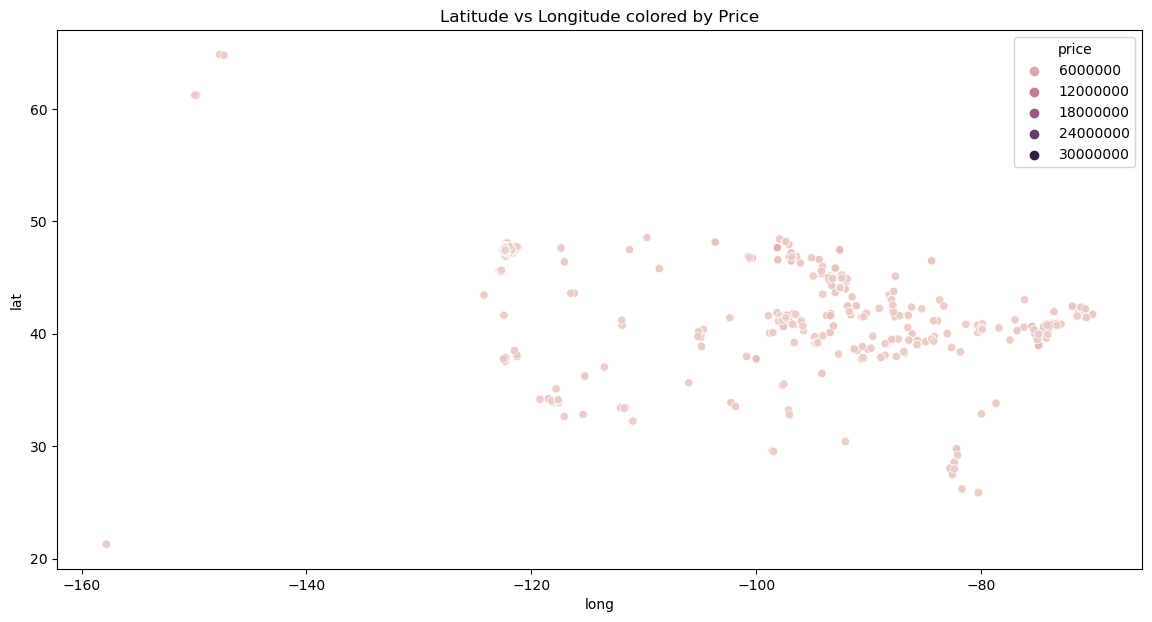

In [10]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=housingDF)
ax.set_aspect('equal')
plt.title("Latitude vs Longitude colored by Price")
plt.show()

Realize that we have bad data in the lat long ield so we will have to remove the outliers outside Kings County

In [11]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth's surface.
    """
    R = 6371  # radius of Earth in km

    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

urban_centers_dict = {
    "Mercer Island": (47.559367, -122.219335),
    "Magnolia": (47.651347, -122.404011),
    "Kirkland": (47.682111, -122.205549),
    "Somerset": (47.557850, -122.147104),
    "Beaver Lake": (47.590782, -121.998691),
    "Union Bay": (47.647763, -122.282622),
    "Medina": (47.625635, -122.232134)
}

def closest_urban_center(row):
    lat1, lon1 = row['lat'], row['long']
    distances = [haversine(lat1, lon1, lat2, lon2) for lat2, lon2 in urban_centers_dict.values()]
    return min(distances)

housingDF['distance'] = housingDF.apply(closest_urban_center, axis=1)

# Create a dataframe of school districts.

I went to google maps to look up each distict in Kings County and found the GPS location of the center of each

In [12]:
# Define a dictionary with school district information
district_dict = {
    17001: ['Seattle', 47.604224, -122.310822],
    17210: ['Federal Way', 47.306740, -122.334571],
    17216: ['Enumclaw', 47.202359, -121.989672],
    17400: ['Mercer Island', 47.563806, -122.221739],
    17401: ['Highline', 47.503040, -122.333787],
    17402: ['Vashon Island', 47.415653, -122.465464],
    17403: ['Renton', 47.480680, -122.194300],
    17404: ['Skykomish', 47.709979, -121.358584],
    17405: ['Bellevue', 47.601939, -122.153399],
    17406: ['Tukwila', 47.465515, -122.264383],
    17408: ['Auburn', 47.298994, -122.209005],
    17409: ['Tahoma', 47.408238, -121.978171],
    17410: ['Snoqualmie Valley', 47.467175, -121.721867],
    17411: ['Issaquah', 47.541392, -122.042553],
    17412: ['Shoreline', 47.758887, -122.340132],
    17414: ['Lake Washington', 47.682244, -122.116046],
    17415: ['Kent', 47.370687, -122.179470],
    17417: ['Northshore', 47.768389, -122.152624],
    27417: ['Fife', 47.246443, -122.331492],
    17407: ['Riverview', 47.706997, -121.847689]
}

# Create a dataframe from the dictionary
df_school_district = pd.DataFrame.from_dict(district_dict, orient='index', columns=['district', 'lat', 'long'])
df_school_district.reset_index(inplace=True)
df_school_district.rename(columns={'index': 'DistrictCode'}, inplace=True)

# Add School Scores to data

* Create a dataframe of School Districts with the average grade of the students

In [13]:
df_school.dropna(subset=['countLevel4'], inplace=True)
grouped = df_school.groupby("DistrictCode")["PercentMetStandardIncludingPP"].mean()
grouped = grouped.reset_index()
df_school_district = df_school_district.merge(grouped, on="DistrictCode")
df_school_district = df_school_district.rename(columns={"PercentMetStandardIncludingPP": "average_grade"})

Added the average grade to the data by finding the closest district to the house

* we know this isn't perfect but for the timeframe this is the easiest way to do it.

In [14]:
# Calculate haversine distances between all the points in the data DataFrame and the df_school_district DataFrame
distances = df_school_district.apply(lambda x: np.sqrt((housingDF['lat'] - x['lat'])**2 + (housingDF['long'] - x['long'])**2), axis=1)

# Find the index of the minimum value in each row
min_idx = distances.idxmin(axis=0)

# Look up the corresponding average_grade value in the df_school_district DataFrame
housingDF = housingDF.assign(school_grade=df_school_district.loc[min_idx, 'average_grade'].values)


# Look at the distrobution of price

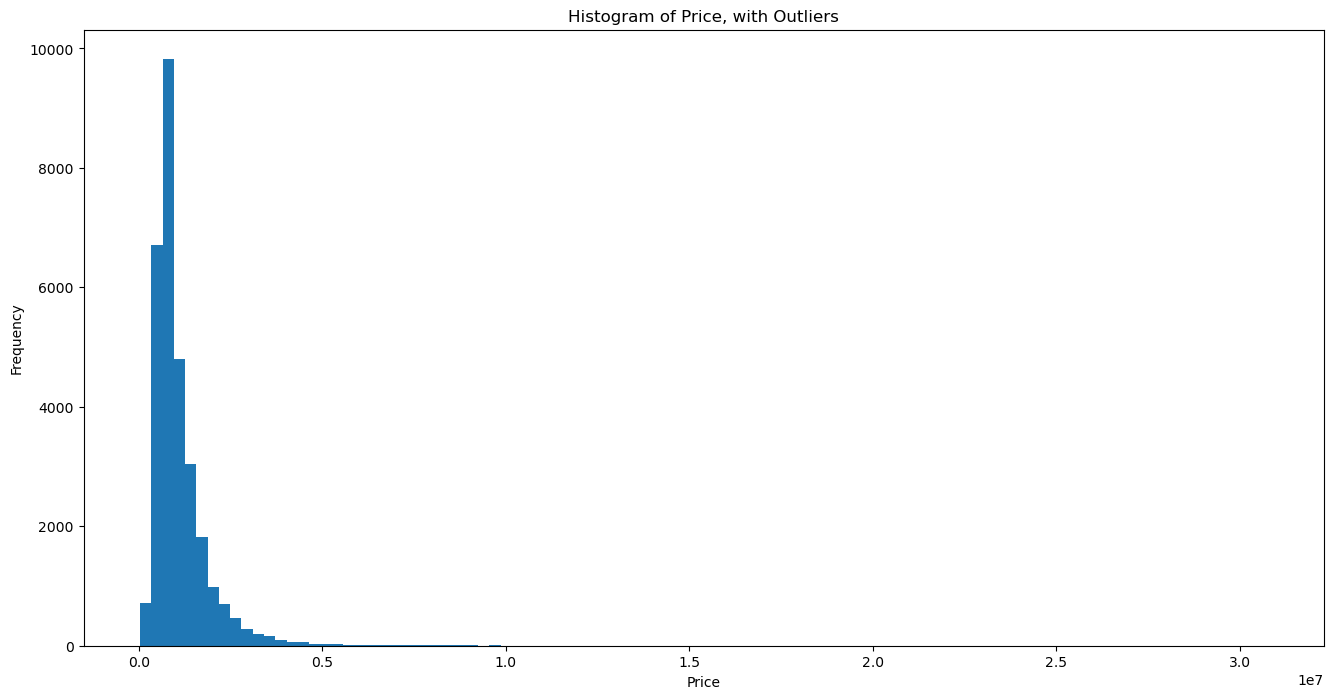

In [15]:
plt.figure(figsize=(16,8))
plt.hist(housingDF['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price, with Outliers')
plt.show()

# Looking at how some of the columns relate to price

Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

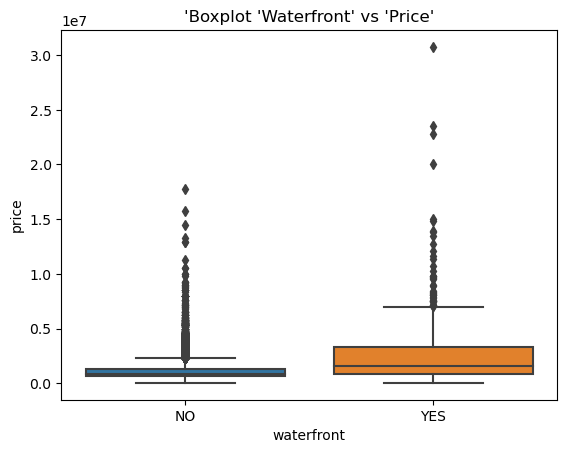

In [16]:
housingDF['waterfront'] = housingDF['waterfront'].astype('category')
sns.boxplot(x='waterfront', y='price', data=housingDF)
plt.title("'Boxplot 'Waterfront' vs 'Price'")

Text(0.5, 1.0, "'Regplot 'sqft_living' vs 'Price'")

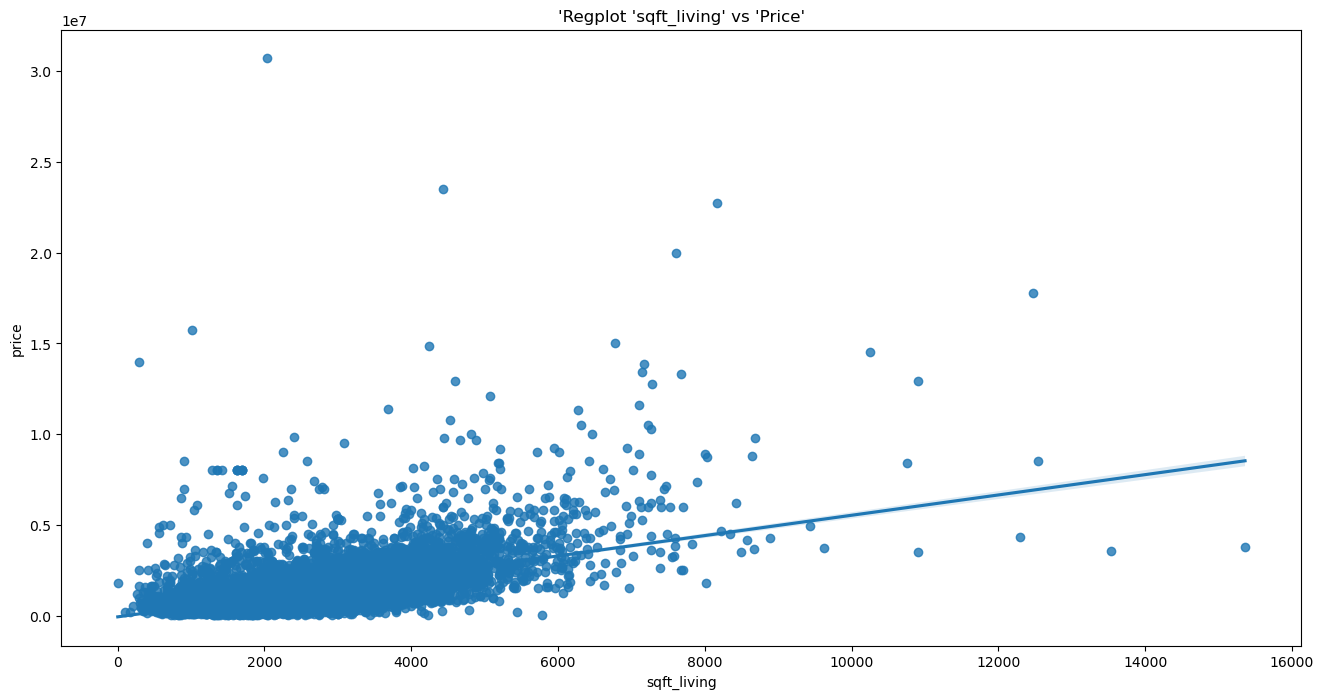

In [17]:
plt.figure(figsize=(16,8))
sns.regplot(x='sqft_living', y='price', data=housingDF)
plt.title("'Regplot 'sqft_living' vs 'Price'")

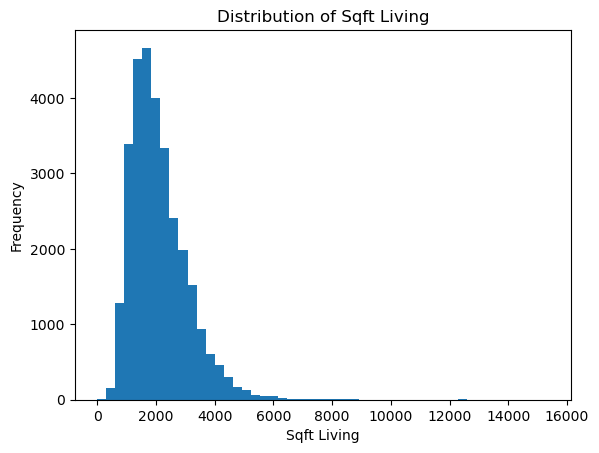

In [18]:
plt.hist(housingDF['sqft_living'], bins=50)
plt.title("Distribution of Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

In [19]:
housingDF = housingDF[housingDF['sqft_living'] <= 5000]
housingDF = housingDF[housingDF['sqft_living'] >= 100]

In [20]:
housingDF = housingDF[housingDF['distance'] <= 25]

In [21]:
housingDF = housingDF[housingDF['price'] <= 2500000]

# Check map again

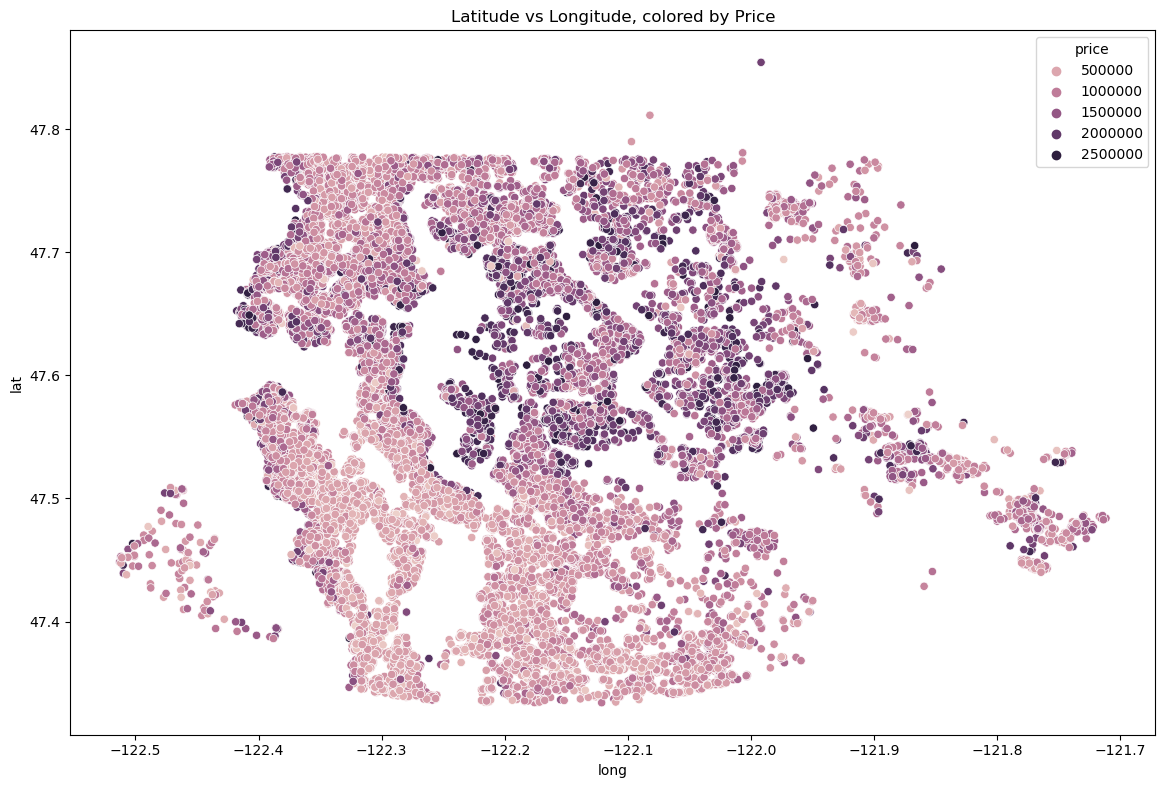

In [22]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=housingDF)
ax.set_aspect('equal')
plt.title("Latitude vs Longitude, colored by Price")
plt.show()

Charts after removal of over 2.5mill houses and getting rid of sqft_living outliers and houses outside of Kings County

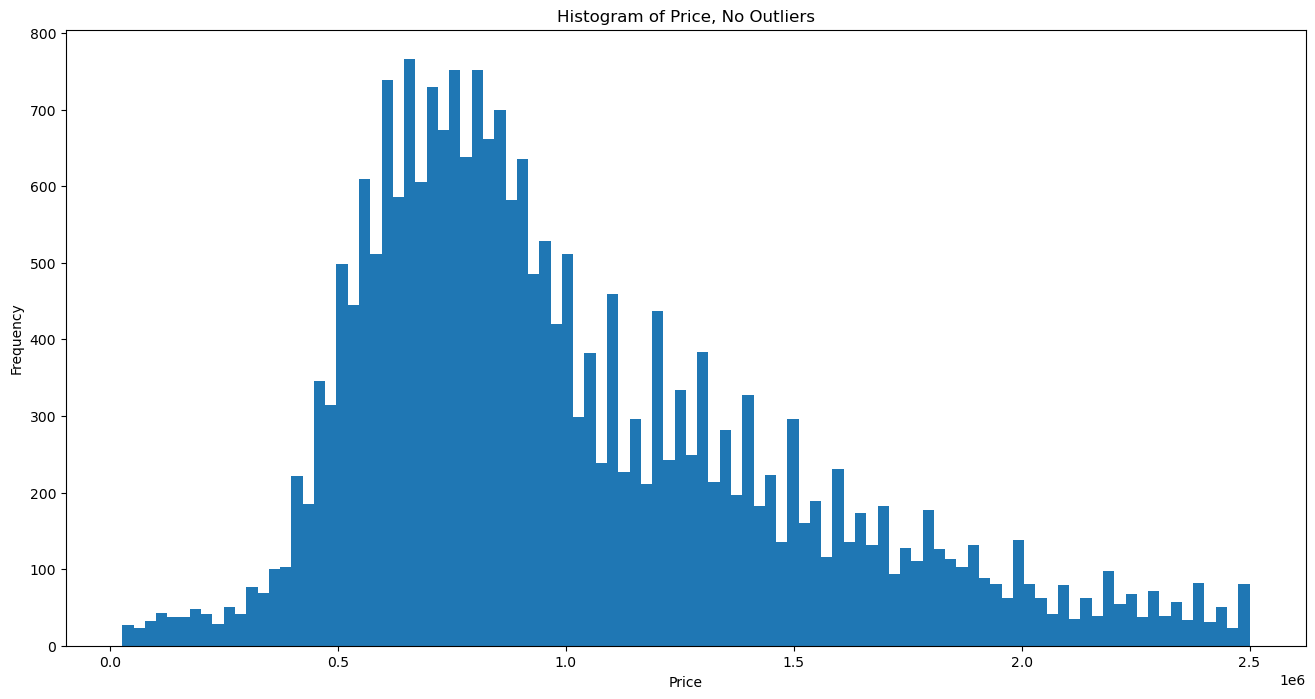

In [23]:
plt.figure(figsize=(16,8))
plt.hist(housingDF['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price, No Outliers')
plt.show()

Text(0, 0.5, 'Sale Price')

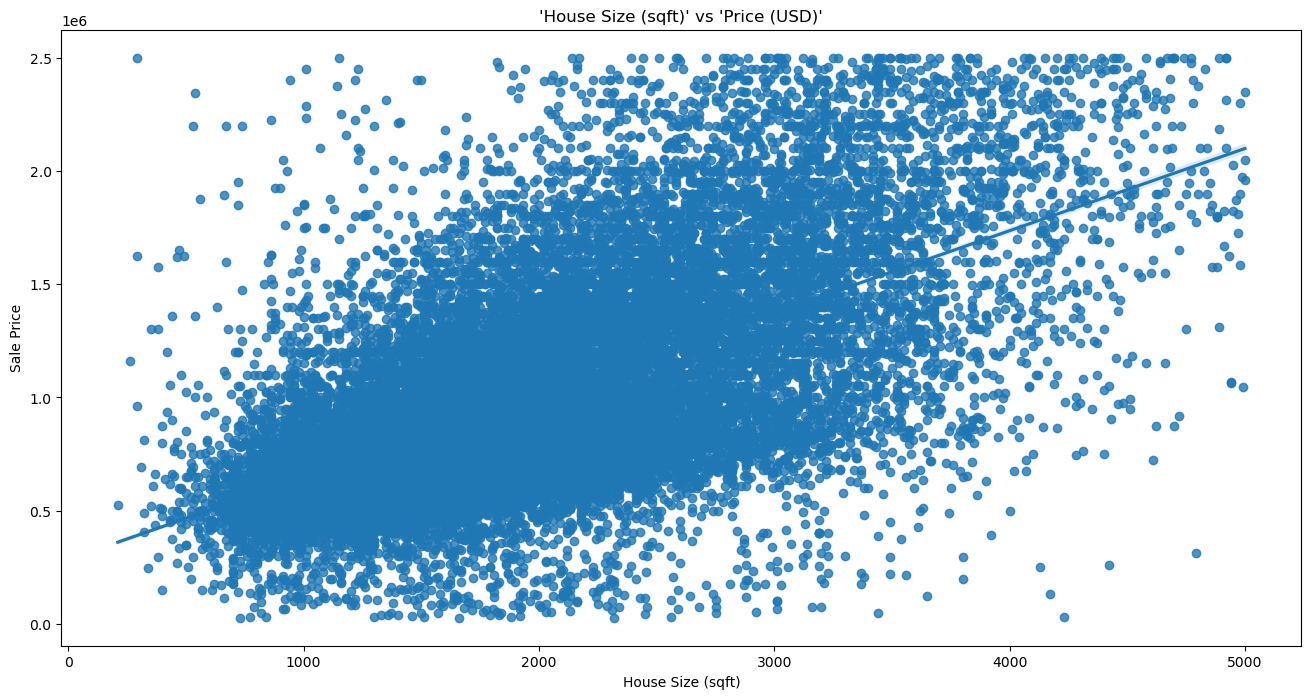

In [24]:
plt.figure(figsize=(16,8))
sns.regplot(x='sqft_living', y='price', data=housingDF)
plt.title("'House Size (sqft)' vs 'Price (USD)'")
plt.xlabel('House Size (sqft)')
plt.ylabel('Sale Price')

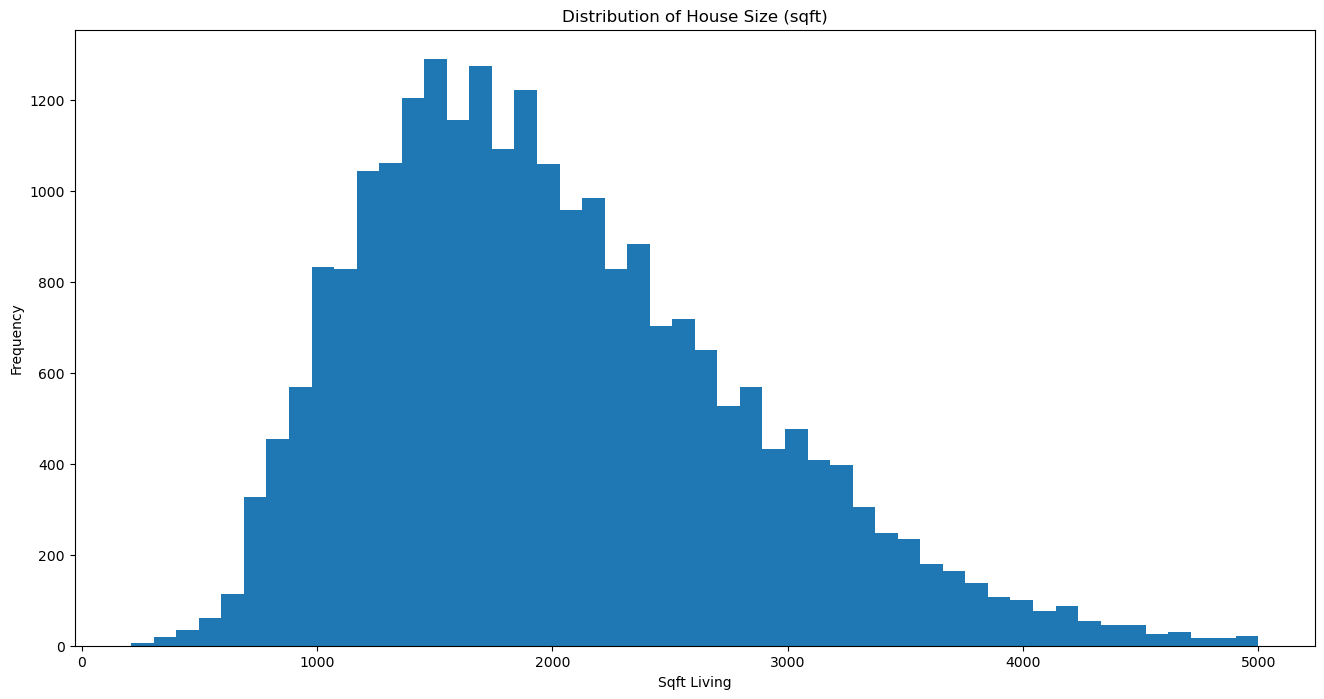

In [25]:
plt.figure(figsize=(16,8))
plt.hist(housingDF['sqft_living'], bins=50)
plt.title("Distribution of House Size (sqft)")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, "'Boxplot 'Greenbelt' vs 'Price'")

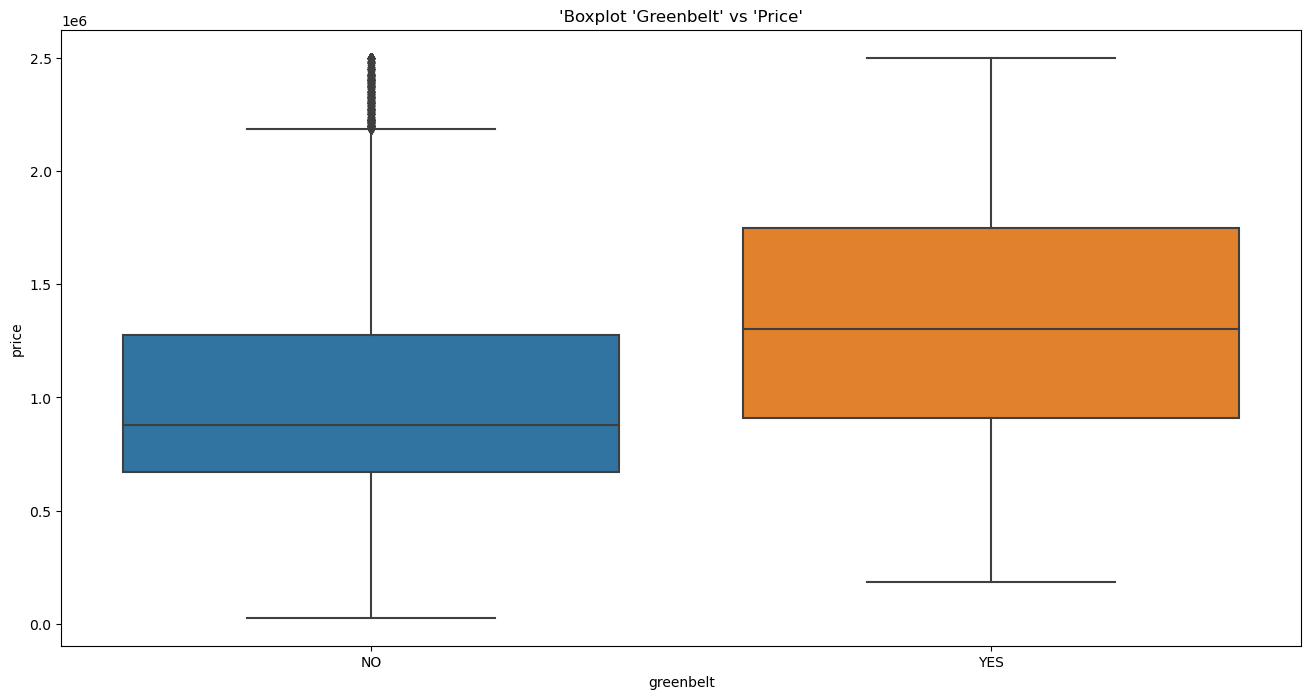

In [26]:
plt.figure(figsize=(16,8))
housingDF['greenbelt'] = housingDF['greenbelt'].astype('category')
sns.boxplot(x='greenbelt', y='price', data=housingDF)
plt.title("'Boxplot 'Greenbelt' vs 'Price'")

Text(0.5, 1.0, "'Boxplot 'Nuisance' vs 'Price'")

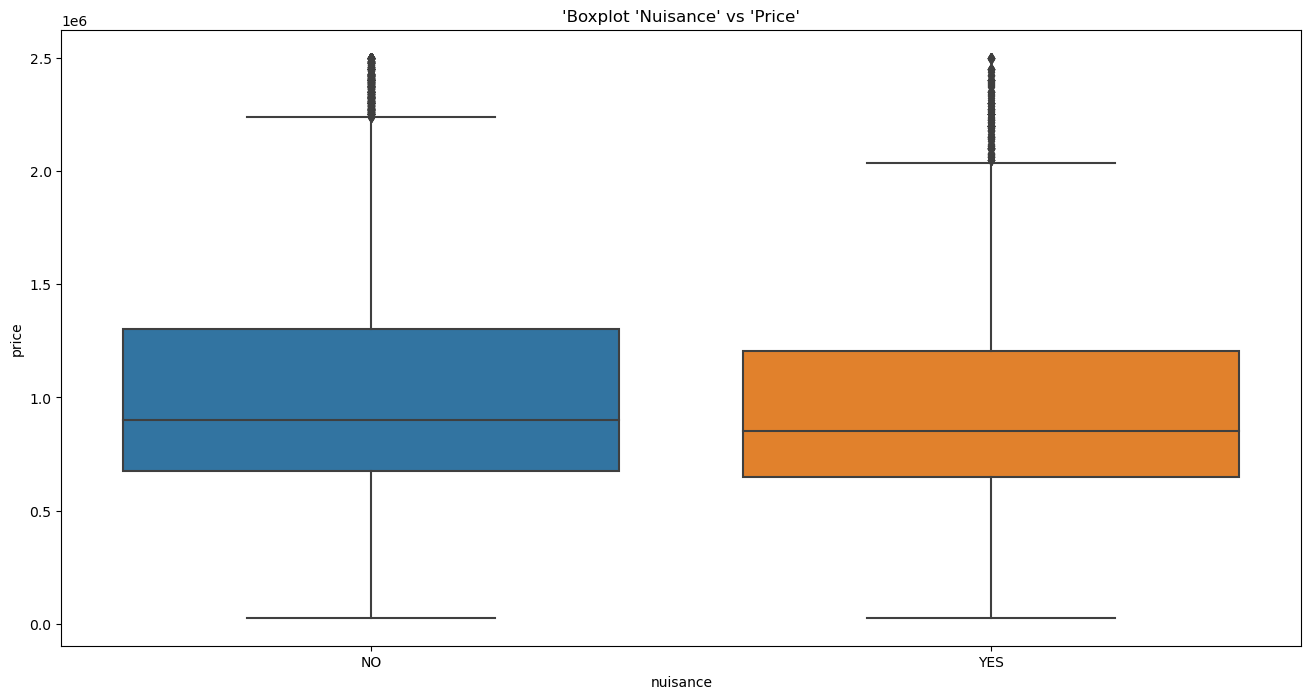

In [27]:
plt.figure(figsize=(16,8))
housingDF['nuisance'] = housingDF['nuisance'].astype('category')
sns.boxplot(x='nuisance', y='price', data=housingDF)
plt.title("'Boxplot 'Nuisance' vs 'Price'")

Text(0.5, 1.0, "'Boxplot 'Heat Source' vs 'Price'")

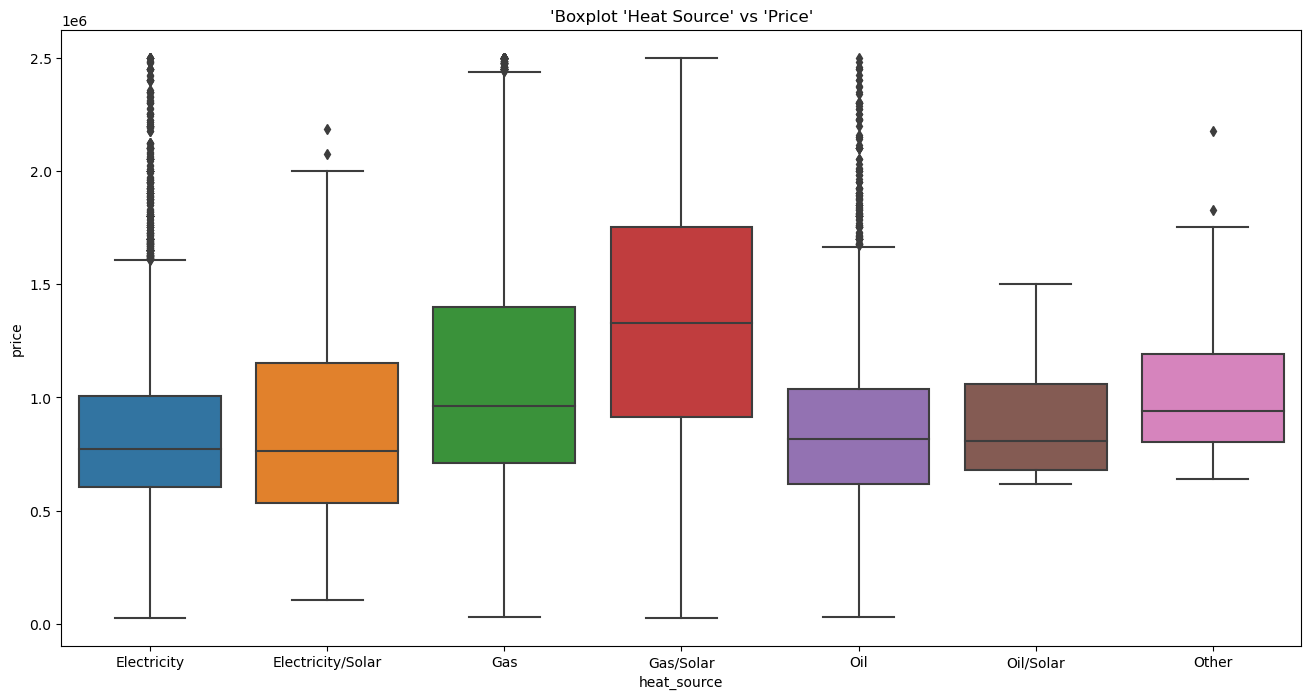

In [28]:
plt.figure(figsize=(16,8))
housingDF['heat_source'] = housingDF['heat_source'].astype('category')
sns.boxplot(x='heat_source', y='price', data=housingDF)
plt.title("'Boxplot 'Heat Source' vs 'Price'")

In [29]:
housingDF = housingDF.dropna()
housingDF['waterfront'] = housingDF['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
housingDF['greenbelt'] = housingDF['greenbelt'].apply(lambda x: 1 if x == 'YES' else 0)
housingDF['nuisance'] = housingDF['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)

Waterfront and Greenbelt seem to have some effect on price but nuisance effect seems minimal

# Change the Ordinal catagories into intigers so they can be used for modeling

In [30]:
housingDF['grade'] = housingDF['grade'].str.extract(r'(\d+)').astype(int)
housingDF['grade'].unique()

array([ 7,  9,  8,  6, 10,  5,  4, 11,  3, 12])

In [31]:
condition_mapping = {'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1}
housingDF['condition'] = housingDF['condition'].map(condition_mapping)
housingDF['condition'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [32]:
view_mapping = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
housingDF['view'] = housingDF['view'].map(view_mapping)
housingDF['view'].unique()

array([1, 3, 5, 2, 4], dtype=int64)

In [33]:
housingDF = housingDF.drop(['heat_source'], axis=1)

Decided to adjust for inflation based on year sold for any price prior to 2022 so the $ of one record is equal to 

In [34]:
housingDF['date'] = pd.to_datetime(housingDF['date'])
housingDF['price'] = housingDF.apply(lambda row: cpi.inflate(row['price'],row['date'].year) if row['date'].year < 2022 else row['price'], axis=1)

In [35]:
housingDF['has_been_renovated'] = np.where(housingDF['yr_renovated'] != 0, 1, 0)

In [36]:
housingDF['zip_code'] = housingDF['address'].str[-20:-15]

In [37]:
# First, calculate the mean sqft_living for each zip code
zip_code_sqft_lot = housingDF.groupby('zip_code')['sqft_lot'].mean()

# Next, divide the zip codes into sq_ft categories based on their mean sqft_living
zip_code_categories = pd.cut(zip_code_sqft_lot, bins=80, labels=False, retbins=False)

# Count the number of rows in the crime dataset grouped by zip code
zip_code_crime = crime.groupby('zip')['case_number'].count()
zip_code_count = housingDF.groupby('zip_code')['zip_code'].count()

# Finally, add the price category as a new column to the train_data dataframe
housingDF['zip_code_category'] = housingDF['zip_code'].map(zip_code_categories)

# Map the bin to the corresponding zip code in data
housingDF['zip_code_category_crime'] = housingDF['zip_code'].map(zip_code_crime) / housingDF['zip_code'].map(zip_code_count)
housingDF['zip_code_category_crime'].fillna(0, inplace=True)


housingDF['has_basement'] = (housingDF['sqft_basement'] > 0).astype(int)
housingDF['has_patio'] = (housingDF['sqft_patio'] > 0).astype(int)
housingDF['sqft_garage'] = (housingDF['sqft_garage'] > 0).astype(int)


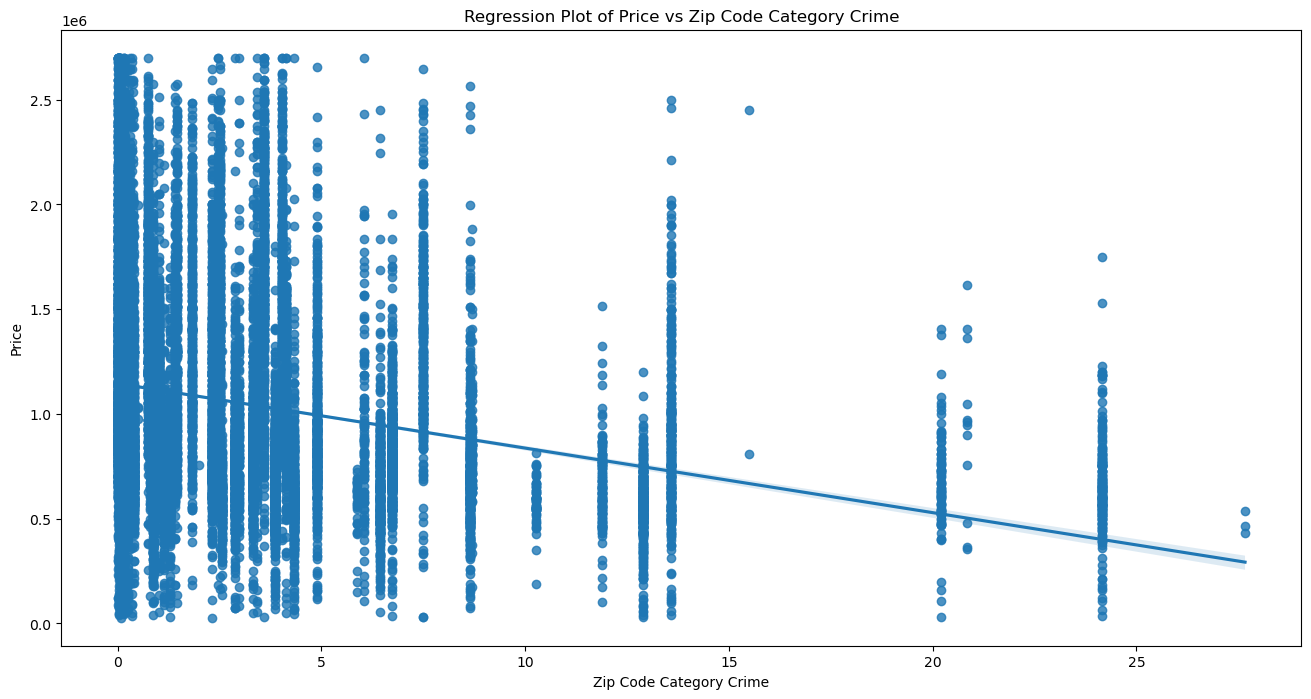

In [38]:
plt.figure(figsize=(16,8))
sns.regplot(x='zip_code_category_crime', y='price', data=housingDF)
plt.xlabel('Zip Code Category Crime')
plt.ylabel('Price')
plt.title('Regression Plot of Price vs Zip Code Category Crime')
plt.show()

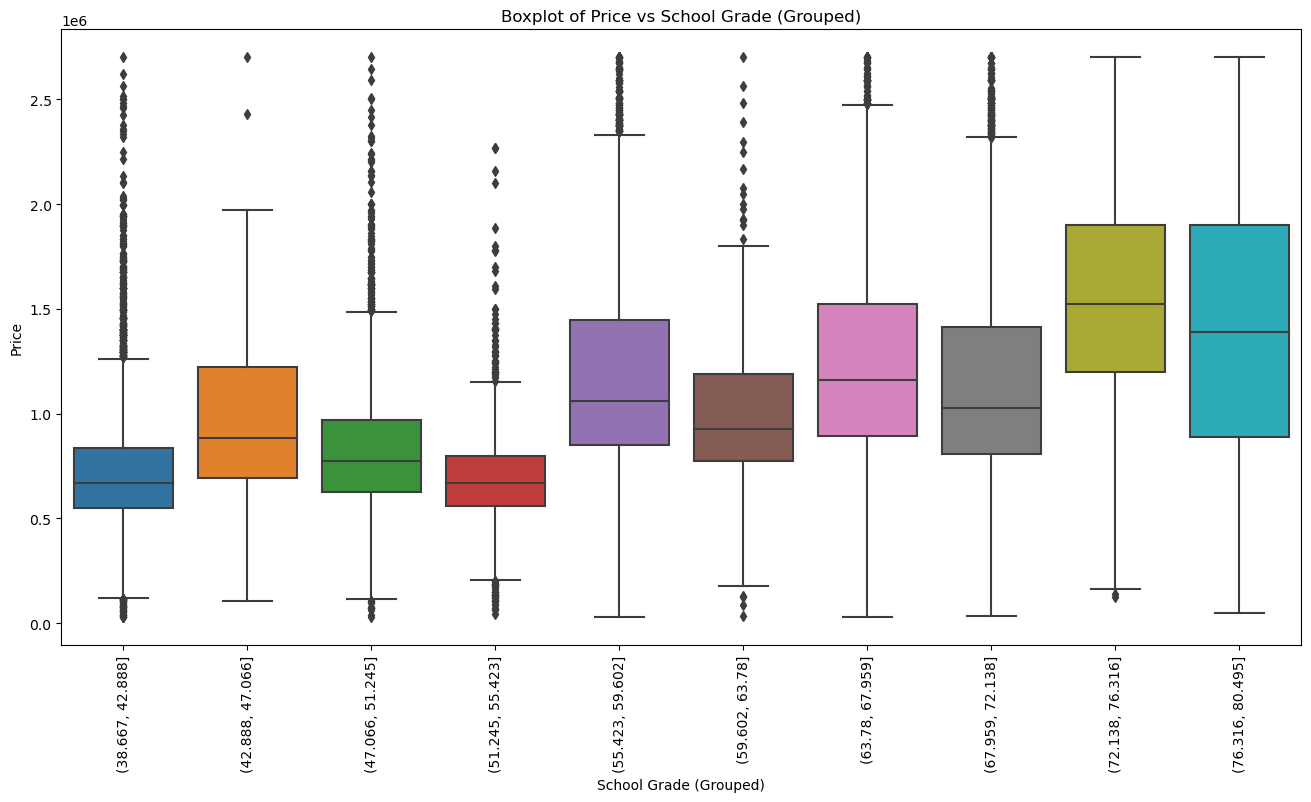

In [39]:
housingDF['school_grade_grouped'] = pd.cut(housingDF['school_grade'], bins=10)

plt.figure(figsize=(16,8))
sns.boxplot(x='school_grade_grouped', y='price', data=housingDF)

plt.xlabel('School Grade (Grouped)')
plt.ylabel('Price')
plt.title('Boxplot of Price vs School Grade (Grouped)')
plt.xticks(rotation=90)
plt.show()

In [40]:
housingDF['distance'] = np.log(housingDF['distance']+1)
housingDF['distance'].describe()

count    24042.000000
mean         2.183936
std          0.634984
min          0.031553
25%          1.732852
50%          2.203685
75%          2.639346
max          3.257922
Name: distance, dtype: float64

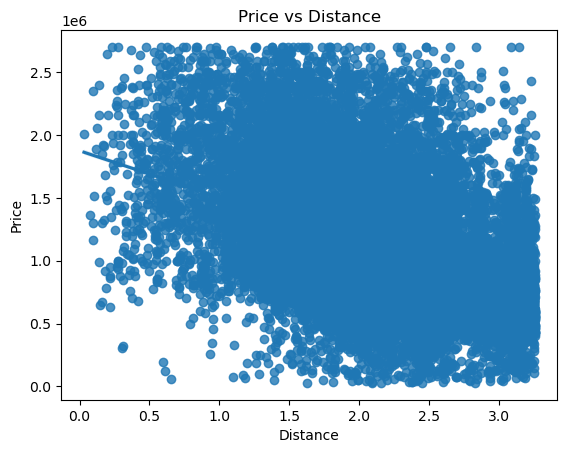

In [41]:
sns.regplot(x='distance', y='price', data=housingDF)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Price vs Distance')
plt.show()

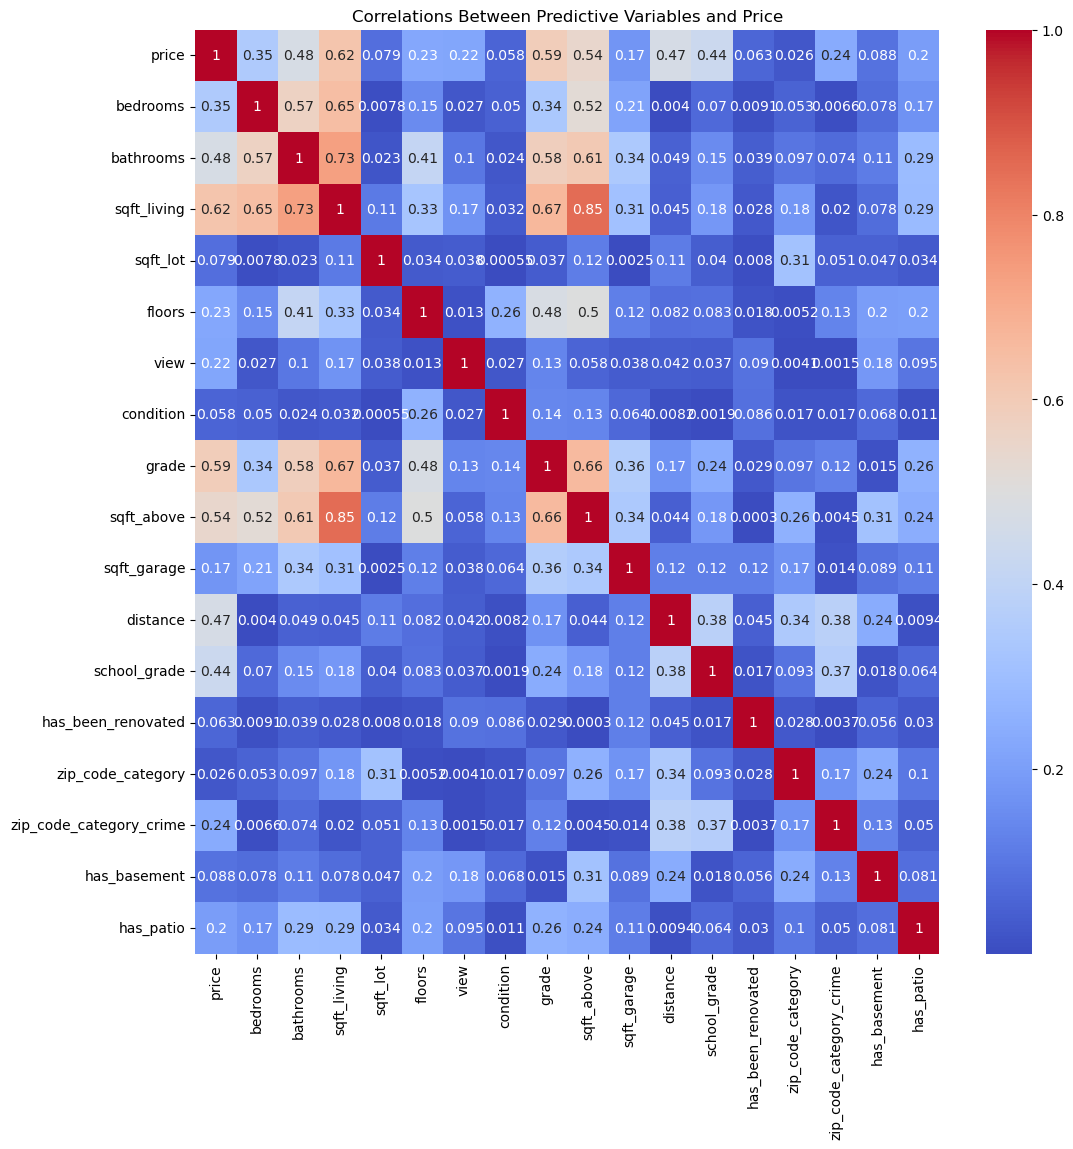

In [42]:
# set up figure size
fig, ax = plt.subplots(figsize=(12, 12))

# set up correlation matrix
corr = abs(housingDF.drop(['id','sqft_basement','sqft_patio','yr_built','yr_renovated','lat','long'], axis=1).corr())

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Correlations Between Predictive Variables and Price");

plt.show()

# Initial Model
    Before One Hot Incoding Zip Code

In [43]:
housingDF.drop('school_grade_grouped', axis=1, inplace=True)

In [44]:
X = housingDF.drop(['price','sewer_system','zip_code','address','date'], axis=1)
y = housingDF['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1930.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:21:57   Log-Likelihood:            -3.3569e+05
No. Observations:               24042   AIC:                         6.714e+05
Df Residuals:                   24014   BIC:                         6.717e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9

# One Hot Incoding Zip Codes

In [45]:
# One hot encode categoricals
zipcode_ohe = pd.get_dummies(housingDF['zip_code'], drop_first=True)
#Concatenate the new dataframe with X_third_train, call new train set with zipcodes X_third_train_zip
housingDF = pd.concat([housingDF, zipcode_ohe], axis=1)

In [46]:
housingDF.drop(['zip_code'], axis=1, inplace=True)

In [47]:
X = housingDF.drop(['price','sewer_system','address','date'], axis=1)
y = housingDF['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     680.8
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:21:57   Log-Likelihood:            -3.3364e+05
No. Observations:               24042   AIC:                         6.675e+05
Df Residuals:                   23944   BIC:                         6.683e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6

# Checking Skewness and Kurtosis of the Category Columns

In [48]:
from scipy.stats import skew, kurtosis

# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['zip_code_category'])
data_kurtosis = kurtosis(housingDF['zip_code_category'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 4.066024162093477
Kurtosis: 27.80881907791652


In [49]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_living'])
data_kurtosis = kurtosis(housingDF['sqft_living'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.7021730141156806
Kurtosis: 0.2078176507739662


In [50]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_lot'])
data_kurtosis = kurtosis(housingDF['sqft_lot'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 28.44037368477573
Kurtosis: 1428.4588235007436


In [51]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['zip_code_category_crime'])
data_kurtosis = kurtosis(housingDF['zip_code_category_crime'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 2.7997581128538576
Kurtosis: 10.139346042645103


In [52]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['school_grade'])
data_kurtosis = kurtosis(housingDF['school_grade'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: -0.39995523909306124
Kurtosis: -1.1035221709841339


# Lets fix the columns we found that are skewed by using Log Transforms

In [53]:
housingDF['zip_code_category_crime'] = np.log(housingDF['zip_code_category_crime']+1)
housingDF['zip_code_category'] = np.log(housingDF['zip_code_category']+1)
housingDF['sqft_living'] = np.log(housingDF['sqft_living'])
housingDF['sqft_lot'] = np.log(housingDF['sqft_lot'])

In [54]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['zip_code_category_crime'])
data_kurtosis = kurtosis(housingDF['zip_code_category_crime'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.6933194967884816
Kurtosis: -0.5820171042861313


In [55]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['zip_code_category'])
data_kurtosis = kurtosis(housingDF['zip_code_category'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.33767293447200325
Kurtosis: -0.3885105099607902


In [56]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_lot'])
data_kurtosis = kurtosis(housingDF['sqft_lot'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.6462957404974558
Kurtosis: 3.0430030458533626


In [57]:
# compute skewness and kurtosis of the data
data_skewness = skew(housingDF['sqft_living'])
data_kurtosis = kurtosis(housingDF['sqft_living'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: -0.29933458566351917
Kurtosis: -0.05900091074763392


# Replace Date, Year Build, and Year Renovated
* I added a column called years since build or renovated to replace the columns that woulden't work in a model as they are not really numeric 

In [58]:
housingDF['yr_renovated'] = np.where(housingDF['yr_renovated'] == 0, housingDF['yr_built'], housingDF['yr_renovated'])
housingDF['date'] = pd.to_datetime(housingDF['date'])
housingDF['year'] = housingDF['date'].dt.year
housingDF['years_since_build_or_renov'] = housingDF['year'] - housingDF[['yr_built', 'yr_renovated']].min(axis=1)
housingDF.drop(['date', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

In [59]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24042 entries, 0 to 30154
Columns: 101 entries, id to years_since_build_or_renov
dtypes: category(3), float64(11), int32(5), int64(8), object(2), uint8(72)
memory usage: 6.2+ MB


# Train / Test Split

In [60]:
train_data, test_data, train_labels, test_labels = train_test_split(housingDF.drop(columns=["id", "address", "lat", "long","sewer_system",'sqft_above','sqft_basement','sqft_patio','sqft_garage']), housingDF["price"], test_size=0.33, random_state=42)


In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16108 entries, 18059 to 29680
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   price                       16108 non-null  float64 
 1   bedrooms                    16108 non-null  int64   
 2   bathrooms                   16108 non-null  float64 
 3   sqft_living                 16108 non-null  float64 
 4   sqft_lot                    16108 non-null  float64 
 5   floors                      16108 non-null  float64 
 6   waterfront                  16108 non-null  category
 7   greenbelt                   16108 non-null  category
 8   nuisance                    16108 non-null  category
 9   view                        16108 non-null  int64   
 10  condition                   16108 non-null  int64   
 11  grade                       16108 non-null  int32   
 12  distance                    16108 non-null  float64 
 13  school_grade

In [62]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     455.7
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:21:59   Log-Likelihood:            -2.2404e+05
No. Observations:               16108   AIC:                         4.483e+05
Df Residuals:                   16018   BIC:                         4.489e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [63]:
train_data.drop(["has_patio"], axis=1, inplace=True)
test_data.drop(["has_patio"], axis=1, inplace=True)

#train_data.drop(["floors"], axis=1, inplace=True)
#test_data.drop(["floors"], axis=1, inplace=True)

#train_data.drop(["nuisance"], axis=1, inplace=True)
#test_data.drop(["nuisance"], axis=1, inplace=True)

#train_data.drop(['bathrooms'], axis=1, inplace=True)
#test_data.drop(['bathrooms'], axis=1, inplace=True)

train_data.drop(["greenbelt"], axis=1, inplace=True)
test_data.drop(["greenbelt"], axis=1, inplace=True)

train_data.drop(["bedrooms"], axis=1, inplace=True)
test_data.drop(["bedrooms"], axis=1, inplace=True)

#train_data.drop(["condition"], axis=1, inplace=True)
#test_data.drop(["condition"], axis=1, inplace=True)

#train_data.drop(["sqft_living"], axis=1, inplace=True)
#test_data.drop(["sqft_living"], axis=1, inplace=True)

train_data.drop(["sqft_lot"], axis=1, inplace=True)
test_data.drop(["sqft_lot"], axis=1, inplace=True)

In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['years_since_build_or_renov']])

# Transform the 'years_since_build_or_renov' column
train_data['years_since_build_or_renov'] = scaler.transform(train_data[['years_since_build_or_renov']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['years_since_build_or_renov']])

# Transform the 'years_since_build_or_renov' column
test_data['years_since_build_or_renov'] = scaler.transform(test_data[['years_since_build_or_renov']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['school_grade']])

# Transform the 'years_since_build_or_renov' column
train_data['school_grade'] = scaler.transform(train_data[['school_grade']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['school_grade']])

# Transform the 'years_since_build_or_renov' column
test_data['school_grade'] = scaler.transform(test_data[['school_grade']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(train_data[['distance']])

# Transform the 'years_since_build_or_renov' column
train_data['distance'] = scaler.transform(train_data[['distance']])

# Fit the scaler to the 'years_since_build_or_renov' column
scaler.fit(test_data[['distance']])

# Transform the 'years_since_build_or_renov' column
test_data['distance'] = scaler.transform(test_data[['distance']])

In [65]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     453.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:22:00   Log-Likelihood:            -2.2434e+05
No. Observations:               16108   AIC:                         4.488e+05
Df Residuals:                   16022   BIC:                         4.495e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

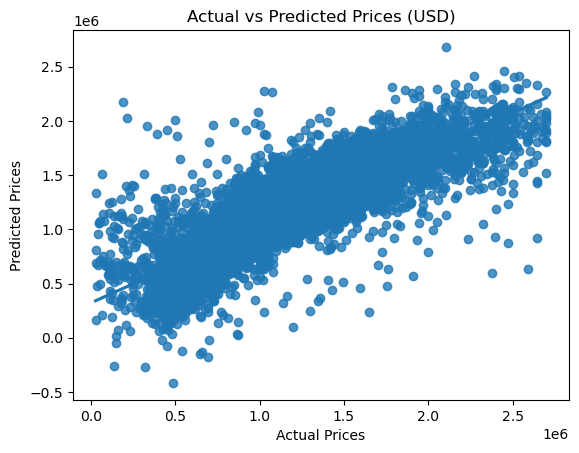

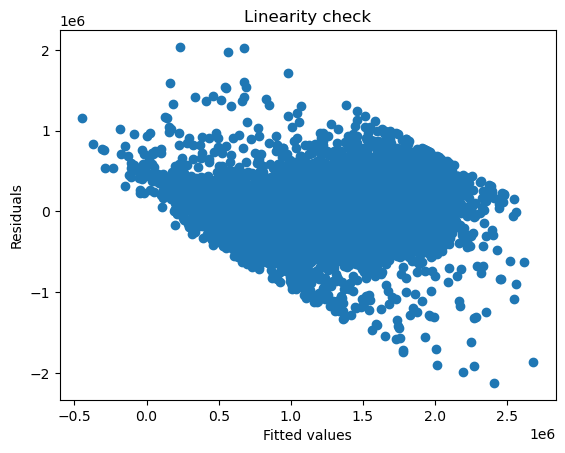

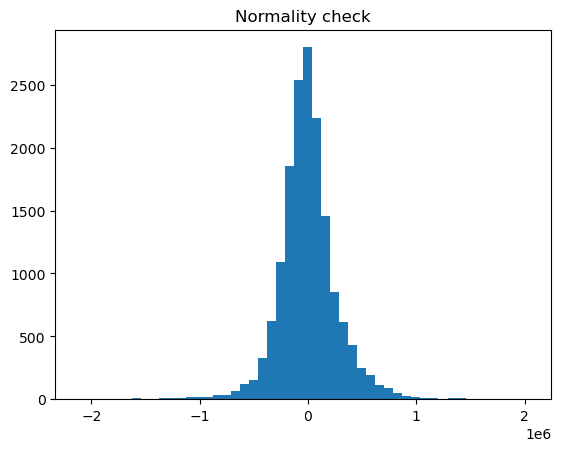

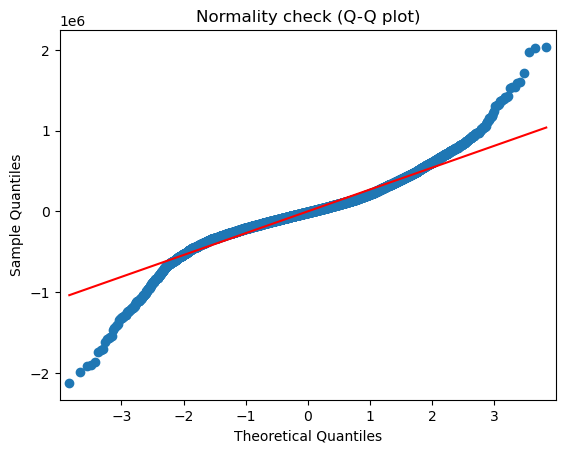

In [66]:

# Use the fitted model to make predictions on the test data
X_test = sm.add_constant(test_data.drop(['price'], axis=1))
predictions = model.predict(X_test)


# Compare the predicted values with the actual prices in the test data
sns.regplot(x=test_data['price'], y=predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (USD)")
plt.show()

# calculate the residuals
#residuals = model2.resid_response

residuals = model.resid

# Plot the residuals against the fitted values to check for linearity
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity check")
plt.show()

# Plot a histogram of the residuals to check for normality
plt.hist(residuals, bins=50)
plt.title("Normality check")
plt.show()

# Plot a Q-Q plot of the residuals to check for normality

sm.qqplot(residuals, line='s')
plt.title("Normality check (Q-Q plot)")
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))

# Calculate the MAE
mae = mean_absolute_error(test_data['price'], predictions)

r2 = r2_score(test_data['price'], predictions)


print("RMSE:", rmse)
print("MAE:", mae)
print('R-squared score:', r2*100)

RMSE: 270246.7921014097
MAE: 189430.82704212877
R-squared score: 70.66344120383238
